#Trabalho Final de Ciências de Dados para Negócios

Equipe:
*   Jessyca Moraes
*   Tammy Gusmão
*   Thalita Alves


Fonte: https://www.kaggle.com/benpowis/customer-propensity-to-purchase-data

##Descrição do Dataset

O dataset escolhido contém valores que representam um dia de visita a um site fictício. Cada linha representa um cliente exclusivo, identificado por seu `UserID` exclusivo. As colunas representam características da visita dos usuários (como o dispositivo que eles estavam usando) e o seu comportamento - o que o usuário fez no site naquele dia. Por exemplo, são adquiridas as seguintes informações: 

* O cliente adicionou algum produto no carrinho a partir da página do produto. Trata-se da coluna `basket_add_detail`.
* O cliente fez login no website? Trata-se da coluna `sign_in`.
* O cliente visitou a *homepage* do site? Referente a coluna `saw_homepage`.
* O cliente é novo no site ou não? Refere-se a coluna `returning_user`.

A *feature target* do dataset é a coluna `ordered`, que informa se o cliente fez alguma compra ou não. A predição é feita em cima desta *feature*.

O dataset está disponibilizado em dois arquivos .csv, separados em conjuntos próprios para treinamento e teste.

##Imports e Utils

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
import itertools
from scipy.spatial import distance
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
from tensorflow import keras
print(keras.__version__)

2.7.0


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

##Carregando o Dataset

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('../data/raw/dataset_train.csv')

df_train

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,5624-06d73a79-5624-450a-acdd-367154,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
455397,42a3-06d74c74-42a3-4dc9-b874-727916,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
455398,104a-06d7a875-104a-428d-b2b8-358312,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
455399,d9b1-06d7a928-d9b1-40d9-a2d6-32624,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
df_test = pd.read_csv('../data/raw/dataset_test.csv')

df_test

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151650,d14b-520k-0j15d14b-520k-4kk2-660471,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
151651,d427-5450-0j15d427-5450-4661-370635,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
151652,8869-1022-0j168869-1022-4490-699568,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
151653,5893-2228-0j165893-2228-4kb7-871348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


##Explorando o Dataset

Esta seção busca verificar, em ambos os dataframes, os tipos de dados presentes, a presença de valores faltantes (NaNs), presença de registros duplicados, uma breve análise descritiva e a identificação e contagem das classes de cada *feature*.

###Dados de Treino

####Linhas x Colunas

In [6]:
df_train.shape

(455401, 25)

####Tipos de Dados x Contagem de NaNs

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

####Contagem de Duplicados

In [8]:
duplicados_train = df_train[df_train.duplicated(keep='first')]
print("Quantia de duplicatas:", duplicados_train.shape[0])

Quantia de duplicatas: 0


####Análise Descritiva

In [9]:
df_train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####Cont. de Valores Únicos

In [10]:
def count_individual_feattures(_df, _columns):
    for var in _columns:
        print(_df[var].value_counts(), '\n')

In [11]:
count_individual_feattures(df_train, df_train.columns.to_list()) 

a720-6b732349-a720-4862-bd21-644732    1
22d3-59b23c76-22d3-4074-a767-183814    1
4c88-59b3d7a2-4c88-4c62-96b0-32243     1
7739-59b3c969-7739-4c7a-80cd-94167     1
0477-59b39376-0477-4b56-843d-931365    1
                                      ..
074a-ac239517-074a-46a4-ab7c-192772    1
7819-ac2356dc-7819-4bb0-83aa-398482    1
0418-ac235007-0418-4b0b-a8b4-96811     1
8468-ac22c648-8468-b164-8707-727029    1
7aav-06d7bd20-7aav-411b-bc9c-325055    1
Name: UserID, Length: 455401, dtype: int64 

0    410248
1     45153
Name: basket_icon_click, dtype: int64 

0    421464
1     33937
Name: basket_add_list, dtype: int64 

0    403979
1     51422
Name: basket_add_detail, dtype: int64 

0    438620
1     16781
Name: sort_by, dtype: int64 

0    443226
1     12175
Name: image_picker, dtype: int64 

0    453775
1      1626
Name: account_page_click, dtype: int64 

0    448020
1      7381
Name: promo_banner_click, dtype: int64 

0    453802
1      1599
Name: detail_wishlist_add, dtype: int64 

0    

###Dados de Teste

####Linhas x Colunas

In [12]:
df_test.shape

(151655, 25)

####Tipos de Dados x Contagem de NaNs

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   151655 non-null  object
 1   basket_icon_click        151655 non-null  int64 
 2   basket_add_list          151655 non-null  int64 
 3   basket_add_detail        151655 non-null  int64 
 4   sort_by                  151655 non-null  int64 
 5   image_picker             151655 non-null  int64 
 6   account_page_click       151655 non-null  int64 
 7   promo_banner_click       151655 non-null  int64 
 8   detail_wishlist_add      151655 non-null  int64 
 9   list_size_dropdown       151655 non-null  int64 
 10  closed_minibasket_click  151655 non-null  int64 
 11  checked_delivery_detail  151655 non-null  int64 
 12  checked_returns_detail   151655 non-null  int64 
 13  sign_in                  151655 non-null  int64 
 14  saw_checkout        

####Contagem de Duplicados

In [14]:
duplicados_test = df_test[df_test.duplicated(keep='first')]
print("Quantia de duplicatas:", duplicados_test.shape[0])

Quantia de duplicatas: 0


####Análise Descritiva

In [15]:
df_test.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,...,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.000000,151655.0
mean,0.074228,0.060954,0.085444,0.036438,0.025334,0.003158,0.014177,0.003053,0.215984,0.013412,...,0.000297,0.005097,0.000996,0.285602,0.681448,0.200673,0.120049,0.529267,0.928324,0.0
std,0.262142,0.239247,0.279542,0.187378,0.157137,0.056112,0.118220,0.055170,0.411504,0.115031,...,0.017223,0.071212,0.031539,0.451702,0.465916,0.400505,0.325020,0.499144,0.257951,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


####Cont. de Valores Únicos

In [16]:
count_individual_feattures(df_test, df_test.columns.to_list()) 

9d24-25k4-47889d24-25k4-494b-398124    1
96bj-b7k7-6k5996bj-b7k7-4154-318270    1
2190-jkj6-6k5j2190-jkj6-4357-638587    1
6b73-2154-6k5j6b73-2154-4527-828230    1
jk02-3234-6k5jjk02-3234-4883-166565    1
                                      ..
d047-bd76-j210d047-bd76-4b50-755800    1
476k-9770-j210476k-9770-4958-342409    1
576b-j744-j211576b-j744-4387-607495    1
7j05-djk9-j2117j05-djk9-4bkb-791821    1
64k0-8720-0j1664k0-8720-447k-692331    1
Name: UserID, Length: 151655, dtype: int64 

0    140398
1     11257
Name: basket_icon_click, dtype: int64 

0    142411
1      9244
Name: basket_add_list, dtype: int64 

0    138697
1     12958
Name: basket_add_detail, dtype: int64 

0    146129
1      5526
Name: sort_by, dtype: int64 

0    147813
1      3842
Name: image_picker, dtype: int64 

0    151176
1       479
Name: account_page_click, dtype: int64 

0    149505
1      2150
Name: promo_banner_click, dtype: int64 

0    151192
1       463
Name: detail_wishlist_add, dtype: int64 

0    

##Tratamento dos Dados

O tratamento inicial foi a remoção da coluna `UserID`:

In [17]:
to_drop = ['UserID']
df_train.drop(labels=to_drop, axis=1, inplace=True)
df_test.drop(labels=to_drop, axis=1, inplace=True)

Foi considerada a possibilidade de remover alguns atributos através de uma análise de correlação entre as *features*. A seção seguinte dá continuidade ao Tratamendo dos Dados.

##Análise de Features

In [18]:
def list_corr(_df, _column_target):
  list_correlations = []
  list_columns = []

  all_features = _df.columns.to_list()

  for i in range(0, len(all_features)-1):

    result_corr = distance.jaccard(_df[_column_target], _df[all_features[i]]) 

    #if (result_corr >= 0.5 ):
    list_correlations.append(result_corr)
    list_columns.append(all_features[i])
    
  dic = {'column_name': list_columns, 'corr_jaccard': list_correlations}
  df_aux = pd.DataFrame(dic)

  return df_aux.sort_values(by=['corr_jaccard'],ascending=False) 

Decidiu-se por manter apenas as colunas com correlação `maior que 0.5` em relação a variável target `ordered`. Assim, as `features` a serem selecionadas são: 

In [19]:
cor_col = list_corr(df_train, 'ordered')

col = list(cor_col[cor_col['corr_jaccard'] > 0.5].column_name)
print(len(col))
col

21


['saw_sizecharts',
 'saw_account_upgrade',
 'detail_wishlist_add',
 'saw_delivery',
 'account_page_click',
 'checked_returns_detail',
 'device_mobile',
 'promo_banner_click',
 'device_tablet',
 'loc_uk',
 'sort_by',
 'returning_user',
 'image_picker',
 'device_computer',
 'closed_minibasket_click',
 'saw_homepage',
 'list_size_dropdown',
 'basket_add_list',
 'basket_add_detail',
 'basket_icon_click',
 'sign_in']

###Redução das Dimensões do Dataset

In [20]:
#Adicionando a coluna target na lista de colunas a serem selecionadas
col.append('ordered')

#Reduzindo o dataset de treino:
df_train = df_train[col].copy()

#Reduzindo o dataset de teste:
df_test = df_test[col].copy()

In [21]:
df_train.head()

,saw_sizecharts,saw_account_upgrade,detail_wishlist_add,saw_delivery,account_page_click,checked_returns_detail,device_mobile,promo_banner_click,device_tablet,loc_uk,...,image_picker,device_computer,closed_minibasket_click,saw_homepage,list_size_dropdown,basket_add_list,basket_add_detail,basket_icon_click,sign_in,ordered
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,1,1,0,0,1,1


In [25]:
df_test.head()

,saw_sizecharts,saw_account_upgrade,detail_wishlist_add,saw_delivery,account_page_click,checked_returns_detail,device_mobile,promo_banner_click,device_tablet,loc_uk,sort_by,returning_user,image_picker,device_computer,closed_minibasket_click,saw_homepage,list_size_dropdown,basket_add_list,basket_add_detail,basket_icon_click,sign_in,ordered
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
print(df_train.shape)
print(df_test.shape)

(455401, 22)
(151655, 22)


##Balanceamento dos Dados

Nesta seção é verificada a situação do balanço entre as classes da *feature target*. 

In [27]:
df_train['ordered'].value_counts()

0    436308
1     19093
Name: ordered, dtype: int64

Diferença entre classes: 417215


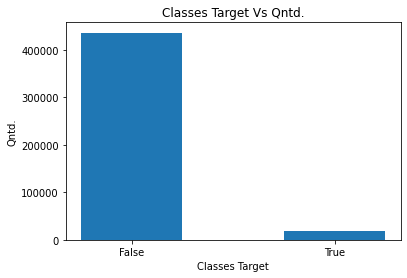

In [28]:
#Checando a quantia de registros para cada classe do atributo target
# e definindo arrays contendo os seus valores

target_series = df_train['ordered'].map({0:'False', 1:'True'})
value_counts_target = target_series.value_counts()

labels_graph = list(value_counts_target.index.values)
values_graph = [value_counts_target[0], value_counts_target[1]]

print("Diferença entre classes:", (value_counts_target[0] - value_counts_target[1]))

plt.bar(labels_graph, values_graph, width=0.5)
plt.title('Classes Target Vs Qntd.')
plt.xlabel('Classes Target')
plt.ylabel('Qntd.')
plt.show()

De acordo com as informações acima, a classe `False` (cliente não realizou compra) possui 417215 registros a mais que a classe `True`.

In [29]:
#Definição das variáveis X e y:

X = df_train.loc[:,df_train.columns[0]:df_train.columns[len(df_train.columns)-2]].values
# df_train.columns[0] -> primeira coluna do dataframe
# df_train.columns[len(df_train.columns)-2] -> penúltima coluna do dataframe

y = df_train['ordered'].values

Diante da desigualdade na quantia de registros, foi optado pelo *Random OverSampling* da classe minoritária:

In [30]:
#Definindo estratégia de Over Sample
oversample = RandomOverSampler(sampling_strategy='minority')
X_samp, y_samp = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X_samp,
                                                      y_samp,
                                                      test_size=0.25,
                                                      random_state=42)

Definindo o *Test Size* de 25%, as amostras de treino e validação foram criadas:

In [32]:
print('Amostras de treino:')
print(f' * X_train: {X_train.shape}')
print(f' * y_train: {y_train.shape}')

print('Amostras de validação:')
print(f' * X_valid: {X_valid.shape}')
print(f' * y_valid: {y_valid.shape}')

Amostras de treino:
 * X_train: (654462, 21)
 * y_train: (654462,)
Amostras de validação:
 * X_valid: (218154, 21)
 * y_valid: (218154,)


##Aplicação de Algoritmo de ML

Nesta seção, o modelo de ML é definido. Após o seu treino, é realizado um teste de validação, focando nos valores de acurácia e de perda (*loss*). Em seguida, avaliamos o modelo através do *classification report* e matriz de confusão. 

Um MLP simples com Keras foi utilizado para a atividade de predição probabilística. 

###Modelagem

In [33]:
model = Sequential()

In [34]:
num_classes = df_train['ordered'].nunique()
num_classes

2

In [35]:
model.add(Dense(42, activation = 'relu', input_dim=21))
model.add(Dropout(0.2))
model.add(Dense(42, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = num_classes-1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                924       
                                                                 
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense_1 (Dense)             (None, 42)                1806      
                                                                 
 dropout_1 (Dropout)         (None, 42)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 43        
                                                                 
Total params: 2,773
Trainable params: 2,773
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

###Treino e Validação

In [37]:
EPOCHS = 10
BATCH_SIZE = 40

In [38]:
history = model.fit(X_train, y_train, 
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE, 
                    verbose = 1,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
16362/16362 [==============================] - 32s 2ms/step - loss: 0.1101 - accuracy: 0.9726 - val_loss: 0.1052 - val_accuracy: 0.9738
Epoch 2/10
16362/16362 [==============================] - 31s 2ms/step - loss: 0.1084 - accuracy: 0.9738 - val_loss: 0.1083 - val_accuracy: 0.9739
Epoch 3/10
16362/16362 [==============================] - 30s 2ms/step - loss: 0.1088 - accuracy: 0.9739 - val_loss: 0.1096 - val_accuracy: 0.9739
Epoch 4/10
16362/16362 [==============================] - 31s 2ms/step - loss: 0.1091 - accuracy: 0.9738 - val_loss: 0.1059 - val_accuracy: 0.9738
Epoch 5/10
16362/16362 [==============================] - 31s 2ms/step - loss: 0.1096 - accuracy: 0.9738 - val_loss: 0.1047 - val_accuracy: 0.9740
Epoch 6/10
16362/16362 [==============================] - 31s 2ms/step - loss: 0.1103 - accuracy: 0.9738 - val_loss: 0.1075 - val_accuracy: 0.9739
Epoch 7/10
16362/16362 [==============================] - 31s 2ms/step - loss: 0.1104 - accuracy: 0.9738 - val_loss: 0

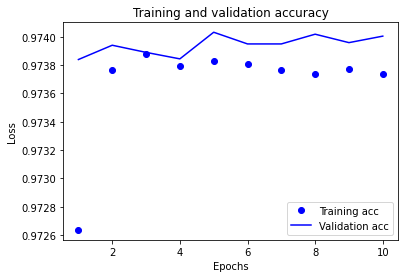

In [39]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

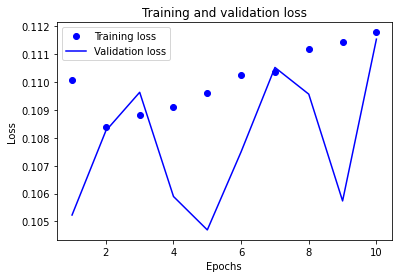

In [40]:
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11154114454984665
Test accuracy: 0.9740046262741089


###Avaliando o Modelo

In [42]:
#Plota uma matriz de confusão
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

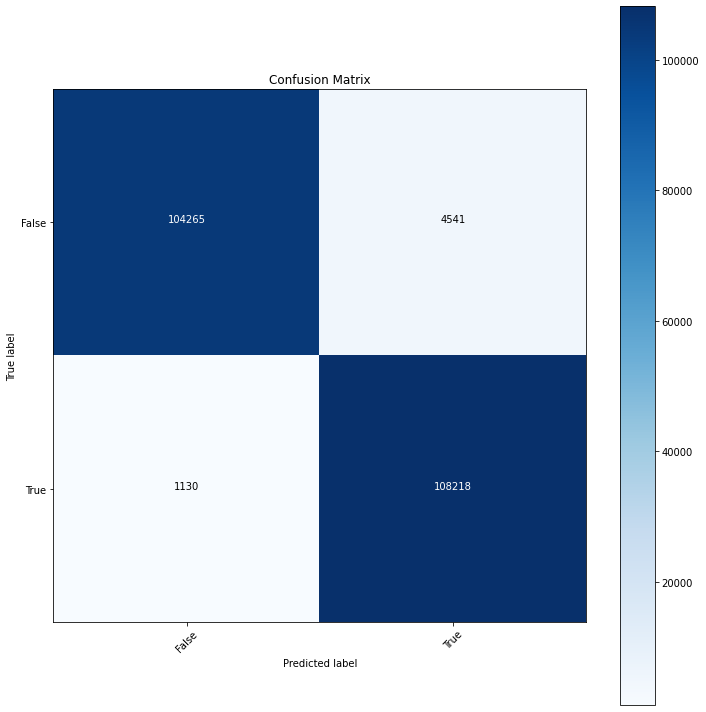

In [43]:
# Classificando toda base de teste
y_pred = (model.predict(X_valid) > 0.5).astype("int32")

target_names = ['False', 'True']

#Plotando a matriz de confusão
cm = confusion_matrix(y_valid, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

In [44]:
print('Classification Report')
print(classification_report(y_valid, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       False       0.99      0.96      0.97    108806
        True       0.96      0.99      0.97    109348

    accuracy                           0.97    218154
   macro avg       0.97      0.97      0.97    218154
weighted avg       0.97      0.97      0.97    218154



##Geração do arquivo .pkl

In [47]:
file_name = 'over_model_mlp.pkl'
pickle.dump(model, open(file_name, "wb"))

INFO:tensorflow:Assets written to: ram://71cb2c3d-159a-47ec-8e06-7808ba87d13f/assets
